# 통계 분석 방법

##1.중심 극한 정리

50000.0
[87000, 69745, 41544, 76975, 94897, 79186, 92410, 19736, 78320, 36759, 95331, 63809, 22607, 7290, 961, 79508, 15159, 21725, 82417, 46644, 24788, 63936, 59224, 59633, 680, 47644, 82059, 58956, 2245, 21582, 47267, 84567, 73824, 24497, 73294, 32782, 39350, 38843, 36034, 94972, 54309, 51941, 23842, 66800, 30050, 45390, 95401, 65530, 56910, 81020, 71661, 5295, 79647, 61302, 73972, 10060, 87252, 67453, 46843, 7435, 99279, 5381, 1428, 38697, 71848, 19165, 8595, 49700, 59837, 58975, 28457, 31240, 49640, 28872, 75195, 31444, 82787, 13223, 35339, 78443, 89653, 67066, 5793, 89408, 20442, 68948, 26815, 65228, 39936, 45987, 46615, 22661, 20383, 61583, 95698, 76753, 77189, 69123, 16791, 11796]
xbar의 평균 :  50001.9313538


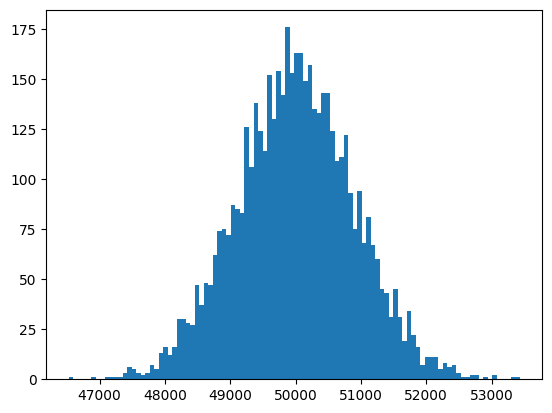

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 모집단 갯수 range(1,100000)
# 모집단 평균, 뮤 = 50000
# 표본의 크기 100
# 시행 횟수 5000
# xbar ~ N(뮤, 분산/n)

print(np.mean(range(1,100000)))
print(random.sample(range(1,100000), 100))

xbar_list = []
for i in range(5000):
  random_sample = random.sample(range(1,100000), 1000)
  xbar = np.mean(random_sample)
  xbar_list.append(xbar)

print("xbar의 평균 : ", np.mean(xbar_list))
plt.hist(xbar_list,bins=100)
plt.show()


##2.t 검정
- 집단 간 평균 차이 검정


### 2-1 One Sample t-test(단일표본 t검정)
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지를 검증하는 방법
- scipy.stats 의 ttest_1samp(a, popman) 이용

In [8]:
# bus_wait_time.csv

import pandas as pd
bus = pd.read_csv('/bus_wait_time.csv')
bus.head()

,waittime
0,14.685862
1,14.099321
2,15.074540
3,14.063753
4,15.004121


In [9]:
bus.shape

(93546, 1)

In [10]:
np.mean(bus.waittime)

15.00011123283454

In [11]:
# 버스회사 주장 15분
# 사용자 주장 15분 아니다

# 1. 가설 생성
# H0 : 뮤 = 15이다
# H1 : 뮤 != 15
# 2. 유의 수준(알파) 0.05
# 3. 검정통계량 산출
# 4. 판정

from scipy import stats
stats.ttest_1samp(bus, popmean=15)

# pvalue > 0.05 : h0 채택
# 판정
# 유의수준 0.05 하에 pvalue 가 0.05로 유의수준보다 크므로 h0 채택
# 따라서 버스 웨이트 타임은 15분이라고 할 수 있다.


TtestResult(statistic=array([0.05884138]), pvalue=array([0.95307857]), df=array([93545]))

In [12]:
# h1 : 뮤 > 15

stats.ttest_1samp(bus, popmean=15, alternative='greater')

TtestResult(statistic=array([0.05884138]), pvalue=array([0.47653929]), df=array([93545]))

### 2-2 Two Sample t-test(독립표본 t검정)
- 서로 다른 두 개의 그룹 간 평균 검정을 위한 방법
- scipy.stats 의 ttest_ind(x, y) 함수 이용


- '새로운 강의 방식이 학생들의 독해력 향상에 도움을 주는가?'
- 새로운 강의 방식에 의한 평균이 기존의 강의방식에 의한 평균보다 큰지 검정
- 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔
- 한 집단에는 기존 방식(old), 한 집단에는 새로운 방식(new)

### H0 : u1 = u2 , H1: u1 > u2

In [14]:
import pandas as pd
reading = pd.read_csv('/Reading.csv')
reading

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


<Axes: xlabel='Group', ylabel='Score'>

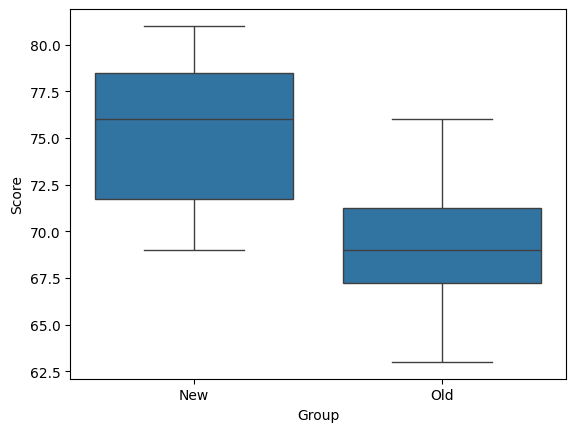

In [15]:
import seaborn as sns
sns.boxplot(x="Group", y ='Score', data = reading)

In [17]:
# 집단 나누기
new = reading[reading.Group=='New']
old = reading[reading.Group=='Old']
new, old

(   ID Group  Score
 0   1   New     75
 1   2   New     80
 2   3   New     72
 3   4   New     77
 4   5   New     69
 5   6   New     81
 6   7   New     71
 7   8   New     78,
     ID Group  Score
 8    9   Old     65
 9   10   Old     70
 10  11   Old     76
 11  12   Old     63
 12  13   Old     72
 13  14   Old     71
 14  15   Old     68
 15  16   Old     68)

In [18]:
# 양측검정
# h0 : new 평균 = old 평균
# h1 : new 평균 != old 평균

stats.ttest_ind(new.Score, old.Score)



TtestResult(statistic=2.9536127902039953, pvalue=0.010470744188033123, df=14.0)

### 2-3 Paired t-test(대응표본 t검정)
- 연관된 두 집단의 차이 에 대한 단일 표본의 평균 검정을 진행하는 방법
- scipy.stats 의 ttest_rel(x, y)
- 실험 단위를 동질적인 쌍으로 묶은 다음 각 쌍에 대해 랜덤하게 두 처리를 적용하고, 각 쌍에서 얻어진 반응 값의 차이를 이용하여 두 모평균 비교


대응표본 t- 검정사례
- '컴퓨터 교육 실시하기 전과 후의 성적 차이가 있는가?'
- 15명의 학생에게 통계학 시험 성적 전후 비교

In [19]:
paired = pd.read_csv('/Paired.csv')


In [21]:
# 가설
# h0 : pretest = posttest, diff  = 0
# h1 : pretest != poosttest, diff != 0

stats.ttest_rel(paired.Pretest, paired.Posttest)

# 귀무가설 기

TtestResult(statistic=-3.093705670004429, pvalue=0.007930923229026533, df=14)

## 3.카이제곱 독립성 검정
- 서로 연관성이 있는가? (독립적인가?)
- scipy.stats 의 chi2_contingency() 함수 이용


- 2차원 교차표(분할표) 작성 - Prefer 데이터

In [23]:
import pandas as pd

Prefer = pd.read_csv('/Prefer.csv')
Prefer

,ID,Agegroup,Product
0,1,30<,B
1,2,30>=,B
2,3,30<,B
3,4,30<,A
4,5,30>=,B
...,...,...,...
295,296,30<,C
296,297,30<,C
297,298,30>=,A
298,299,30>=,C


In [24]:
Prefer.Agegroup.unique()

array(['30<', '30>='], dtype=object)

In [25]:
Prefer.Product.unique()

array(['B', 'A', 'C'], dtype=object)

In [26]:
# pd.crosstab

prefer_table = pd.crosstab(index= Prefer.Agegroup, columns= Prefer.Product)
prefer_table

Product,A,B,C
Agegroup,,,
30<,20,20,60
30>=,70,100,30


In [27]:
# h0 : 독립이다, 상관이 없다, (0 = E)
# h1 : 독립이 아니다. 상관이 있다 (0 = E)
stats.chi2_contingency(prefer_table)

# 유의수준 0.05 하에 p value 가 0.05보다 작으므로 귀무가설 기각
# 따라서 독립이 아니다. age 그룹과 product 는 상관이 있다.

Chi2ContingencyResult(statistic=65.0, pvalue=7.681204685202098e-15, dof=2, expected_freq=array([[30., 40., 30.],
       [60., 80., 60.]]))

##4.상관 분석

In [28]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

student=pd.read_csv('/Student.csv')


In [31]:
student

,ID,Age,Income,Expense
0,1,25,170,67
1,2,28,177,62
2,3,20,165,53
3,4,16,150,48
4,5,19,160,58
5,6,21,160,59
6,7,22,173,60
7,8,16,169,57
8,9,20,169,70
9,10,19,170,71


In [32]:
student.corr()

,ID,Age,Income,Expense
ID,1.000000,0.066649,0.586110,0.694915
Age,0.066649,1.000000,0.546968,0.529814
Income,0.586110,0.546968,1.000000,0.681296
Expense,0.694915,0.529814,0.681296,1.000000


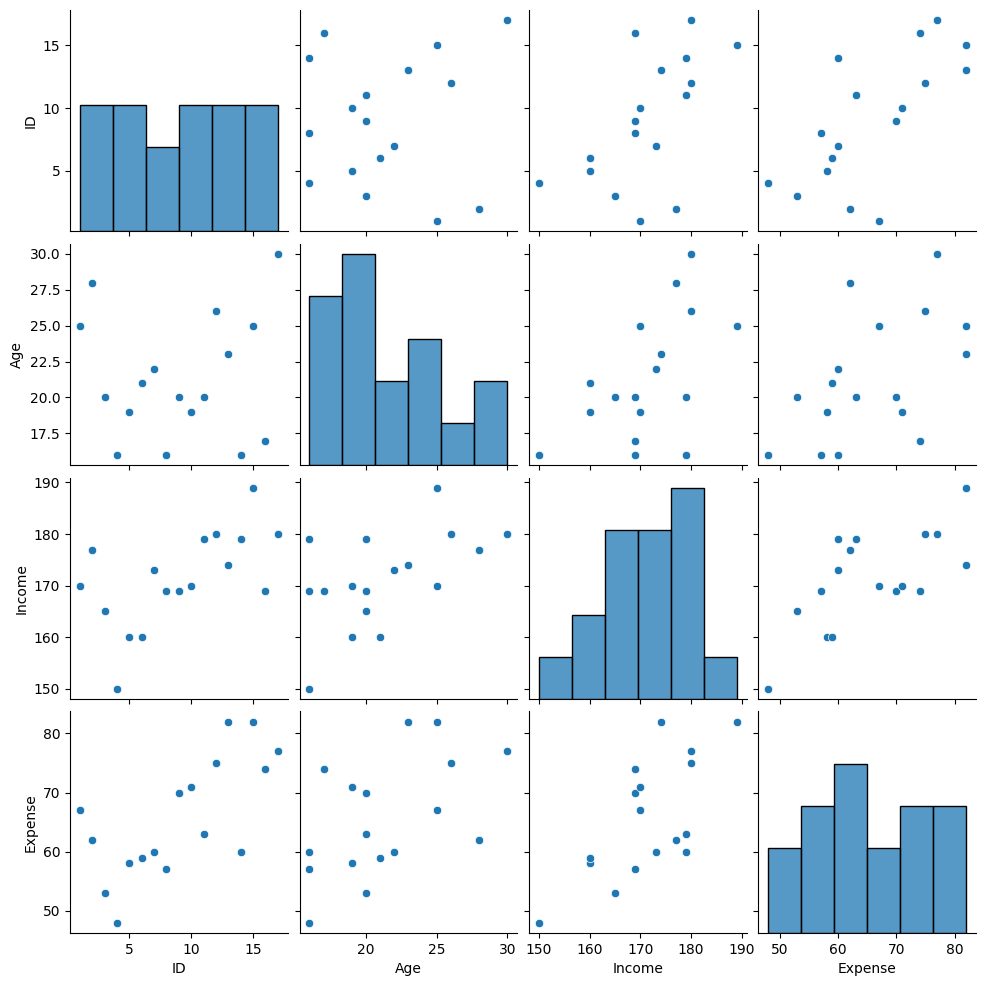

In [33]:
sns.pairplot(student)

In [34]:
# 상관계수 검정

# h0 : r = 0
# h1 : r != 0

stats.pearsonr(student.Income, student.Expense)
# pvalue가 0.05보다 작음. 귀무가설 기각
# 상관계수는 유의미하다

PearsonRResult(statistic=0.6812956535794541, pvalue=0.0026006496946941993)

In [35]:
stats.pearsonr(student.Age, student.Expense)

PearsonRResult(statistic=0.5298142545063669, pvalue=0.02871176071104469)